# JTP Turtle Nesting Analysis
This is an analysis project for Juara Turtle Project, Tioman Island, Malaysia.

## Intro
Founded in 2006, Juara Turtle Project runs a number of volunteer based conservation projects to manage the impact of pollution and threats to the environment on Tioman island, a small island off the South-East coast of Malaysia with amazing ecological divesrsity. One of the major projects of the JTP is sea turtle conservation, where the organization works with local community, sometimes with the help of international volunteers, to manage threats to the breeding turtle population

A major part of turtle conservation involves tracking mother turtles who come ashore for nesting, observe and relocate turtle eggs to human-built nesting sites for better , release baby turtles back to the sea after hatchling, and investigate failed hatchlings. 

JTP wants to understand which factors would impact the hatch rate of turtle eggs and in what ways.

## About the Data Set
The dataset used in this analysis is provided by JTP, which is a record of the turtle nesting data from 2017 to 2022, including the number of eggs laid/hatched, where the eggs were laid, the turtle species, measurements of sample eggs, relocation time etc. 
* There's a column named "Fungi/Bacteria", which records how many eggs were infected by fungus in a particular nest, a phenomenon noticed by JTP and has been given increasing attention in recent years, but the cause and impact of the infection are still under investigation. And the "infection rate per nest" column is calculated using the number of infected eggs divided by the total number of eggs.
* Based on past experiences, JTP suspects the hatch rate is mainly impacted by fungus infection rate and relocation time. So this analysis will start with looking at these 2 factors, as well as some other potential factors.
* JTP also wants to find out how the infection rate is changing over the past few years, so I'll include this at the last part of the analysis.

## Data Examination & Cleaning
_You can jump to "Conclusion" if you want to skip the data processing and model building process!_

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib 
import seaborn as sns

In [3]:
data = pd.read_csv('../JTP/Infection_relocation_working_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Nest UID
(auto)          281 non-null    object 
 1   Year
(auto)              281 non-null    int64  
 2   Year 
UID                281 non-null    int64  
 3   Laid Date                281 non-null    object 
 4   Total of eggs            281 non-null    int64  
 5   Hatched eggs             281 non-null    int64  
 6   Fungi/Bacteria           234 non-null    float64
 7   infection rate per nest  281 non-null    object 
 8   Beach                    281 non-null    object 
 9   Beach Order              280 non-null    float64
 10  Beach Sector             177 non-null    object 
 11  Event                    281 non-null    object 
 12  Species                  281 non-null    object 
 13  CCL (cm)                 78 non-null     float64
 14  CCW (cm)                 7

In [4]:
data.head()

,Nest UID\n(auto),Year\n(auto),Year \nUID,Laid Date,Total of eggs,Hatched eggs,Fungi/Bacteria,infection rate per nest,Beach,Beach Order,...,Collection Date,Collection Time,Collection Staff,Relocation Time,Relocation Staff,relocation (auto),Hatchery position,NEST,CONTROLLER,Notes
0,2017-BAK001,2017,1,04/04/2017,113,104,8.0,7.08%,Bakau,1.0,...,04/04/2017,9:00:00,BETO,10:30:00,BETO,1:30:00,NaN,NaN,NaN,NaN
1,2017-PEN000,2017,2,10/04/2017,151,108,43.0,28.48%,Penut,0.0,...,10/04/2017,8:15:00,BETO,9:20:00,BETO,1:05:00,NaN,NaN,NaN,NaN
2,2017-MEN001,2017,3,14/04/2017,187,153,4.0,2.14%,Mentawak,1.0,...,14/04/2017,0:30:00,BETO+IZ,2:00:00,BETO+IZ,1:30:00,NaN,NaN,NaN,NaN
3,2017-BAK003,2017,4,14/04/2017,102,98,3.0,2.94%,Bakau,3.0,...,14/04/2017,8:15:00,BETO,10:55:00,BETO,2:40:00,NaN,NaN,NaN,NaN
4,2017-BAK004,2017,5,23/04/2017,106,91,16.0,15.09%,Bakau,4.0,...,23/04/2017,7:10:00,BETO,9:30:00,BETO,2:20:00,NaN,NaN,NaN,NaN


In [5]:
# Select columns we need for analysis
data = data[['Nest UID\n(auto)', 'Year\n(auto)', 'Year \nUID', 'Laid Date', 'Total of eggs', 'Hatched eggs', 'Fungi/Bacteria', 'infection rate per nest', 'Beach', 'Species', 'Collection Date', 'Collection Time', 'Relocation Time', 'relocation (auto)']]
data['hatch_rate'] = data['Hatched eggs']/data['Total of eggs']
data.head()

,Nest UID\n(auto),Year\n(auto),Year \nUID,Laid Date,Total of eggs,Hatched eggs,Fungi/Bacteria,infection rate per nest,Beach,Species,Collection Date,Collection Time,Relocation Time,relocation (auto),hatch_rate
0,2017-BAK001,2017,1,04/04/2017,113,104,8.0,7.08%,Bakau,Green,04/04/2017,9:00:00,10:30:00,1:30:00,0.920354
1,2017-PEN000,2017,2,10/04/2017,151,108,43.0,28.48%,Penut,Hawksbill,10/04/2017,8:15:00,9:20:00,1:05:00,0.715232
2,2017-MEN001,2017,3,14/04/2017,187,153,4.0,2.14%,Mentawak,Hawksbill,14/04/2017,0:30:00,2:00:00,1:30:00,0.818182
3,2017-BAK003,2017,4,14/04/2017,102,98,3.0,2.94%,Bakau,Green,14/04/2017,8:15:00,10:55:00,2:40:00,0.960784
4,2017-BAK004,2017,5,23/04/2017,106,91,16.0,15.09%,Bakau,Green,23/04/2017,7:10:00,9:30:00,2:20:00,0.858491


In [6]:
# Formatting 
data = data.rename(columns={'Nest UID\n(auto)':'Nest ID', 'Year\n(auto)':'Year', 'Year \nUID':'Year ID', 'relocation (auto)':'relocation interval', 'infection rate per nest':'infection_rate'}) # Rename some columns
data['Fungi/Bacteria'].fillna(0, inplace=True) # Replace null values with 0 in the Fungi/Bacteria column
data['infection_rate'] = data['infection_rate'].str.rstrip('%').astype('float')/100 # change infection rate type to float

data['relocation interval'] = data['relocation interval'].astype('timedelta64[m]') # Converting time interval to minutes
data['relocation_minutes'] = data['relocation interval'].dt.total_seconds().astype('float')/60 
#data['Laid Date'] = pd.to_datetime(data['Laid Date'], dayfirst=True)

In [7]:
data.head()

,Nest ID,Year,Year ID,Laid Date,Total of eggs,Hatched eggs,Fungi/Bacteria,infection_rate,Beach,Species,Collection Date,Collection Time,Relocation Time,relocation interval,hatch_rate,relocation_minutes
0,2017-BAK001,2017,1,04/04/2017,113,104,8.0,0.0708,Bakau,Green,04/04/2017,9:00:00,10:30:00,0 days 01:30:00,0.920354,90.0
1,2017-PEN000,2017,2,10/04/2017,151,108,43.0,0.2848,Penut,Hawksbill,10/04/2017,8:15:00,9:20:00,0 days 01:05:00,0.715232,65.0
2,2017-MEN001,2017,3,14/04/2017,187,153,4.0,0.0214,Mentawak,Hawksbill,14/04/2017,0:30:00,2:00:00,0 days 01:30:00,0.818182,90.0
3,2017-BAK003,2017,4,14/04/2017,102,98,3.0,0.0294,Bakau,Green,14/04/2017,8:15:00,10:55:00,0 days 02:40:00,0.960784,160.0
4,2017-BAK004,2017,5,23/04/2017,106,91,16.0,0.1509,Bakau,Green,23/04/2017,7:10:00,9:30:00,0 days 02:20:00,0.858491,140.0


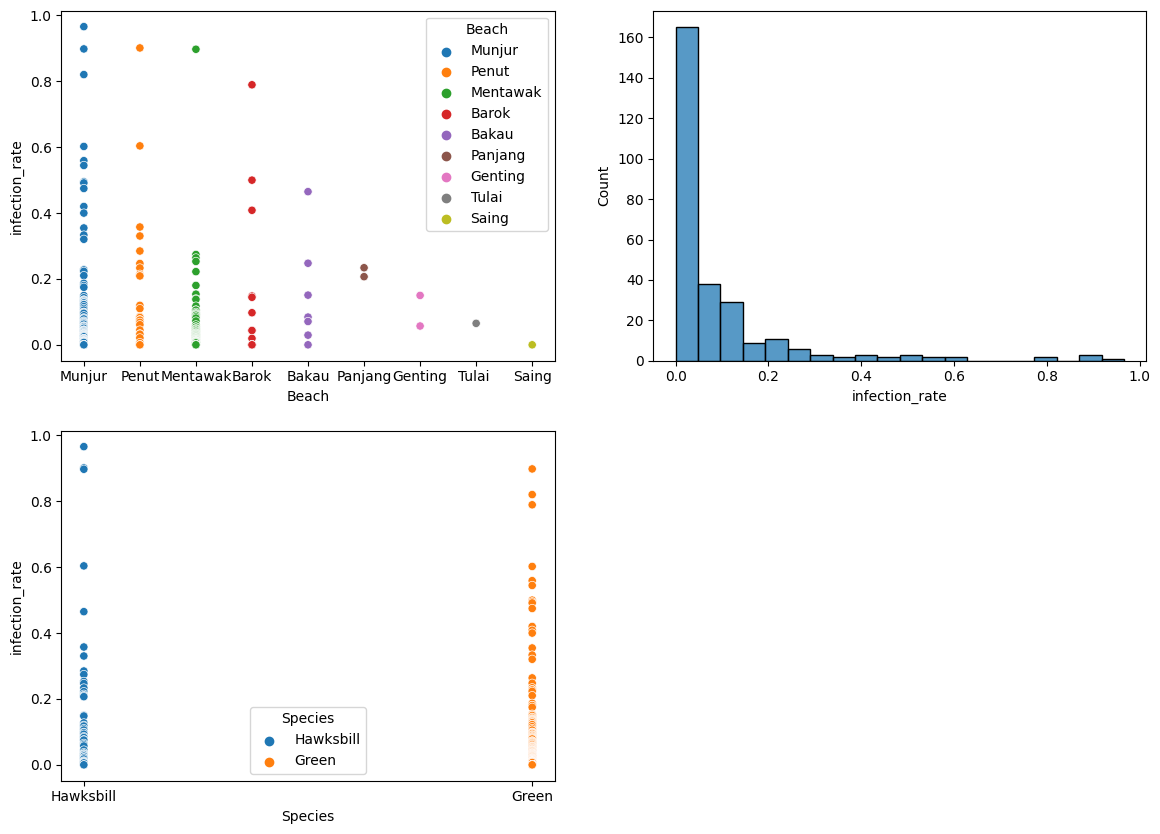

In [8]:
# Check for Univariate outliners
# First the infection rate
fig = plt.figure(figsize=(14, 10))
plt.subplot(2,2,1)
p = sns.scatterplot(x='Beach', y='infection_rate', data=data.sort_values(by='infection_rate', ascending=False), hue='Beach')
# p.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

plt.subplot(2,2,2)
g = sns.histplot(data=data, x='infection_rate', bins=20)

plt.subplot(2,2,3)
j = sns.scatterplot(x='Species', y='infection_rate', data=data.sort_values(by='infection_rate', ascending=False), hue='Species')

In [9]:
# Bakau, Panjang, Genting, Tulai and Saing have less than 10 (mostly 1-2) records as these beaches are more remote and JTP rarely travels there anymore. 
# For this analysis JTP wants to limit the scope to more nearby beaches. So we'll remove them.
data = data.loc[~data['Beach'].isin(['Panjang', 'Genting', 'Tulai', 'Saing', 'Tulai ', 'Bakau'])]

# There are some outliners in the data set (on the far right end(the ones with infection rate above 0.7) and we'll remove them too.
data = data.loc[data['infection_rate']< 0.75]

<AxesSubplot:xlabel='hatch_rate', ylabel='Count'>

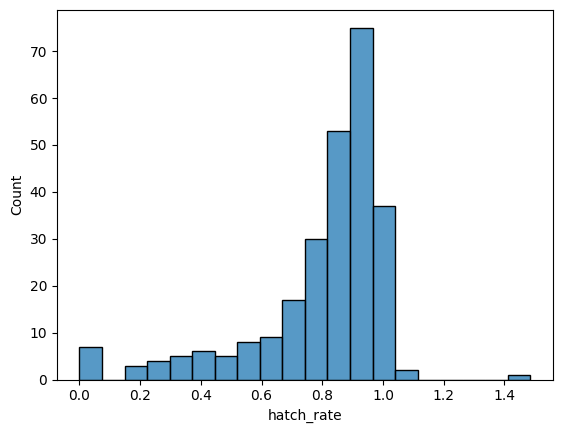

In [10]:
# Next we'll look at the hatch rate
fig = plt.figure()
sns.histplot(data=data, x='hatch_rate', bins=20)

In [11]:
# There seems to be some problematic records with hatch rate over 100%, let's take them out
data[data['hatch_rate']>1]

,Nest ID,Year,Year ID,Laid Date,Total of eggs,Hatched eggs,Fungi/Bacteria,infection_rate,Beach,Species,Collection Date,Collection Time,Relocation Time,relocation interval,hatch_rate,relocation_minutes
207,2021-BAR001,2021,11,03/06/2021,121,122,0.0,0.0000,Barok,Green,03/06/2021,22:10:00,22:36:00,0 days 00:26:00,1.008264,26.0
209,2021-MEN008,2021,13,16/06/2021,99,101,1.0,0.0101,Mentawak,Green,16/06/2021,1:50:00,2:45:00,0 days 00:55:00,1.020202,55.0
211,2021-MEN010,2021,15,30/06/2021,105,156,1.0,0.0095,Mentawak,Green,30/06/2021,22:30:00,23:30:00,0 days 01:00:00,1.485714,60.0
212,2021-MEN011,2021,16,10/07/2021,99,103,0.0,0.0000,Mentawak,Green,10/07/2021,23:45:00,0:24:00,0 days 00:39:00,1.040404,39.0
215,2021-MEN013,2021,19,30/07/2021,98,105,1.0,0.0102,Mentawak,Green,30/07/2021,23:30:00,0:00:00,0 days 00:30:00,1.071429,30.0
262,2022-MEN038,2022,46,17/06/2022,98,99,1.0,0.0102,Mentawak,Green,NaN,NaN,NaN,NaT,1.010204,NaN
263,2022-MEN039,2022,47,25/06/2022,117,120,1.0,0.0085,Mentawak,Green,NaN,NaN,NaN,NaT,1.025641,NaN


In [12]:
# It appears that these entries have more hatched eggs than the total of eggs laid in the nest, probably due to man-made recording errors. 
# But the staff who recorded the data are no longer working at JTP. So we'll replace the hatch rate with the annual average of that specific year.
def HatchRate_Refill(data, year):
    # slice = data.loc[data['Year']==year]
    # idx_drop = slice.index[slice['Hatch rate']>1]
    # idx = data.index[data['Year']==year].drop(idx_drop)
    idx = np.where((data['Year'] == year)  & (data['hatch_rate'] <= 1))[0]
    total_eggs = data.iloc[idx].agg({'Total of eggs': 'sum'}).values
    hatched_eggs = data.iloc[idx].agg({'Hatched eggs': 'sum'}).values
    hr = hatched_eggs/total_eggs
    for i in np.where((data['Year'] == year)  & (data['hatch_rate'] > 1))[0]:
        data.iloc[i,-2] = hr


HatchRate_Refill(data, 2021)
HatchRate_Refill(data, 2022)
# print(data.iloc[207:215])

<AxesSubplot:xlabel='hatch_rate', ylabel='Count'>

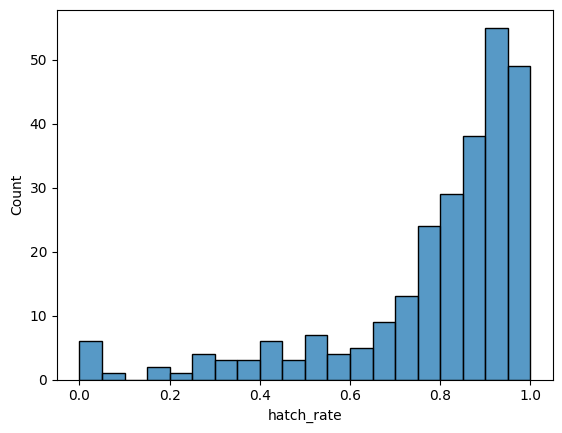

In [13]:
# check again
fig = plt.figure()
sns.histplot(data=data, x='hatch_rate', bins=20)

<AxesSubplot:xlabel='relocation_minutes', ylabel='Count'>

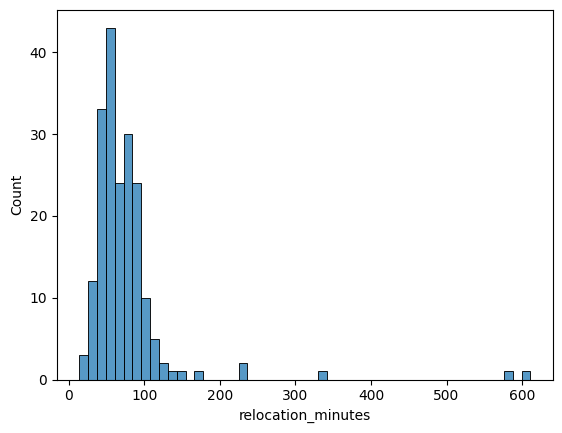

In [14]:
# Check relocation time
fig = plt.figure()
sns.histplot(data=data, x='relocation_minutes')

<AxesSubplot:xlabel='Species', ylabel='Count'>

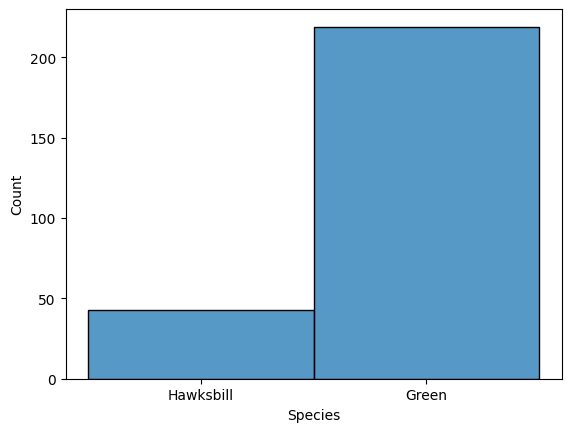

In [15]:
# Check species
fig = plt.figure()
sns.histplot(data=data, x='Species')

<AxesSubplot:xlabel='Species', ylabel='hatch_rate'>

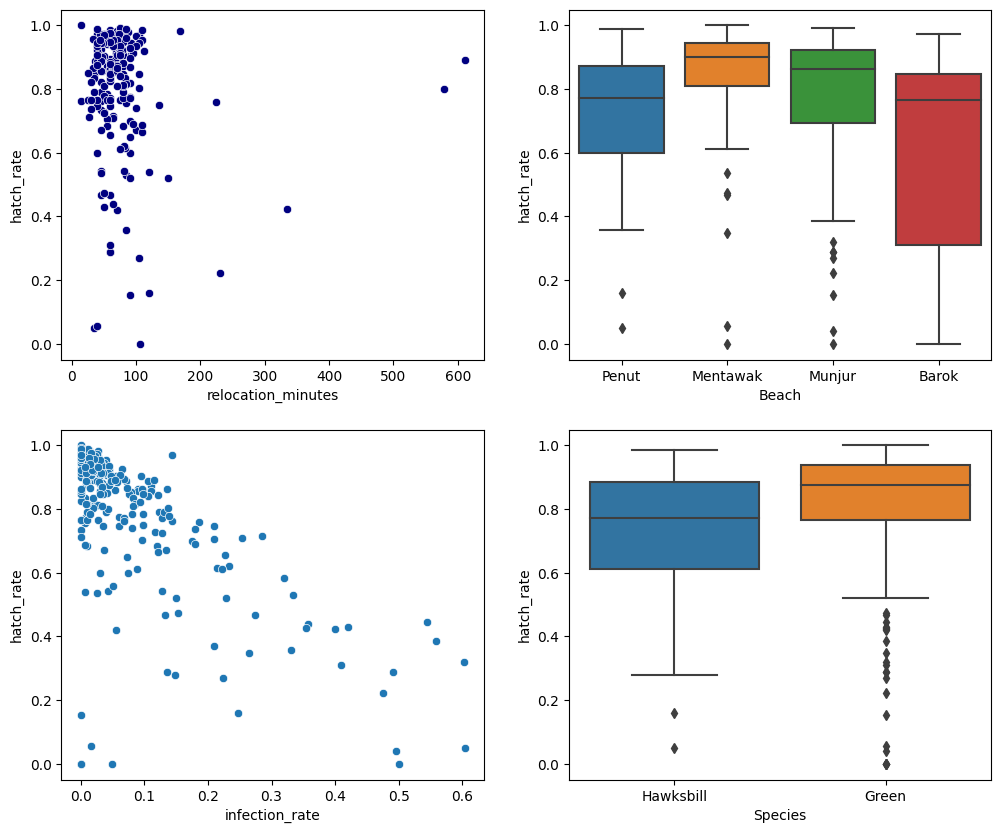

In [16]:
# Visualize correlation between Hatch rate and individual variable
fig = plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)
ax1 = sns.scatterplot(data=data, x='relocation_minutes', y='hatch_rate', color='navy')

plt.subplot(2,2,3)
sns.scatterplot(data=data, x='infection_rate', y='hatch_rate')
# sns.set_palette('Blues')

plt.subplot(2,2,2)
sns.boxplot(data=data, x='Beach', y='hatch_rate')

plt.subplot(2,2,4)
sns.boxplot(data=data, x='Species', y='hatch_rate')

The upper left scatter plot shows there's no apparent correlation between relocation time and hatch rate. When I tried to add relocation time as a feature to the model, it also yielded insignificant result. So in the next section, I'll build the regression model with only the other 3 features: infection rate, beach and species.

## Build Regression Model

In [17]:
# Build model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from scipy.stats import boxcox

In [42]:
# As infection rate might be correlated with beach and species, let's first check pair correlations to aviod multicolinearity
species_map = data['Species'].map({'Green': 0, 'Hawksbill':1})
beach_map = data['Beach'].map({'Bakau': 0, 'Penut':1, 'Mentawak':2, 'Munjur':3, 'Barok':4})
d = {'infection_rate' : data['infection_rate'], 'Species': species_map, 'Beach': beach_map}
x_vif = pd.DataFrame(data=d)

# print(x_vif)

vif_res = pd.DataFrame()
vif_res["feature"] = x_vif.columns
vif_res["VIF"] = [variance_inflation_factor(x_vif.values, i)
                          for i in range(len(x_vif.columns))]
print(vif_res)

          feature       VIF
0  infection_rate  1.524871
1         Species  1.154601
2           Beach  1.447202


In [20]:
# Train test split: we'll use 10% as the test set
expr = 'hatch_rate ~ infection_rate + Beach + Species'
y, x = dmatrices(expr, data, return_type='dataframe')

split_index = round(len(data)*0.9)
y_train = y.loc[y.index <= split_index].copy()
y_test = data.loc[y.index > split_index].copy()
x_train = x.loc[x.index <= split_index].copy()
x_test = x.loc[x.index > split_index].copy()


In [21]:
# Build LR model with OLS method
model = sm.OLS(y_train, x_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             hatch_rate   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     37.18
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           2.07e-27
Time:                        21:19:39   Log-Likelihood:                 98.872
No. Observations:                 222   AIC:                            -185.7
Df Residuals:                     216   BIC:                            -165.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.7585      0.045     16.763      0.000       0.669       0.848
Beach[T.Mentawak]        0.1326      0.048      2.786      0.006       0.039       0.226
Beach[T.Munjur]          0.1411      0.046      3.042      0.003       0.050       0.233
Beach[T.Penut]           0.1336      0.059      2.262      0.025       0.017       0.250
Species[T.Hawksbill]    -0.0202      0.036     -0.557      0.578      -0.091       0.051
infection_rate          -1.3138      0.108    -12.168      0.000      -1.527      -1.101
==============================================================================
Omnibus:                      156.243   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1323.792
Skew:                          -2.771   Prob(JB):                    3.49e-288
Kurtosis:                      13.602   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

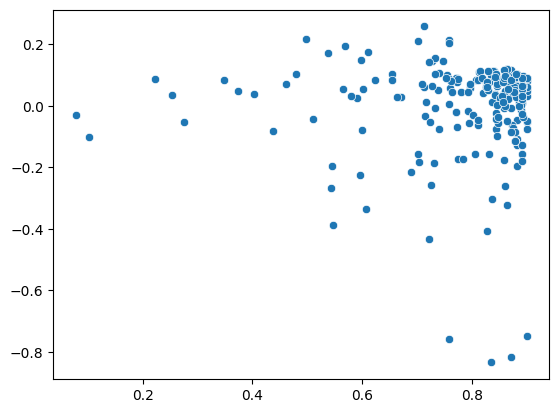

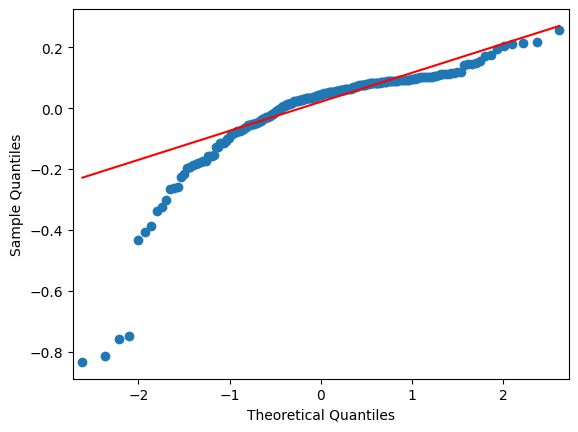

In [22]:
# Omnibus and JB tests indicate non-normality and heteroscedasticity of the residuals. Let's plot the residuals to double-check.
res = result.resid
y_fitted = result.fittedvalues

fig, ax = plt.subplots()
ax1 = sns.scatterplot(x=y_fitted, y=res)

ax2= sm.qqplot(res,line='q')

In [23]:
# With the multiple linear regression model, there're 2 issues:
# 1. Non-normality and heteroscedasticity of residuals, which makes the model unreliable
# 2. The predicted value of hatch rate can be negative or above 1, which doesn't make sense in real world.
# To address the issues, we'll build a GLM model with a log link.

# Remove the rows with hatch rate=0 as log function only takes positive values.
idx = y_train[y_train['hatch_rate']==0].index
x_train = x_train.drop(index=idx)
y_train = y_train.drop(index=idx)


In [25]:
# Build the glm model
result = sm.GLM(y_train, x_train, family=sm.families.Gamma(link=sm.genmod.families.links.Log())).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             hatch_rate   No. Observations:                  219
Model:                            GLM   Df Residuals:                      213
Model Family:                   Gamma   Df Model:                            5
Link Function:                    Log   Scale:                        0.037721
Method:                          IRLS   Log-Likelihood:                 31.412
Date:                Sat, 02 Sep 2023   Deviance:                       14.132
Time:                        21:19:40   Pearson chi2:                     8.03
No. Iterations:                    13   Pseudo R-squ. (CS):             0.6849
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1672      0.060     -2.788      0.005      -0.285      -0.050
Beach[T.Mentawak]        0.0800      0.063      1.274      0.203      -0.043       0.203
Beach[T.Munjur]          0.1155      0.062      1.868      0.062      -0.006       0.237
Beach[T.Penut]           0.0721      0.076      0.946      0.344      -0.077       0.221
Species[T.Hawksbill]    -0.0163      0.045     -0.362      0.717      -0.104       0.072
infection_rate          -2.3329      0.139    -16.729      0.000      -2.606      -2.060
========================================================================================
"""

In [26]:
# The co-efficient for "Species" is not significant, let's remove it and re-train the model.
x_train = x_train[['infection_rate', 'Intercept']]


result = sm.GLM(y_train, x_train, family=sm.families.Gamma(link=sm.genmod.families.links.Log())).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             hatch_rate   No. Observations:                  219
Model:                            GLM   Df Residuals:                      217
Model Family:                   Gamma   Df Model:                            1
Link Function:                    Log   Scale:                        0.037353
Method:                          IRLS   Log-Likelihood:                 28.001
Date:                Sat, 02 Sep 2023   Deviance:                       14.330
Time:                        21:19:40   Pearson chi2:                     8.11
No. Iterations:                    12   Pseudo R-squ. (CS):             0.6808
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
infection_rate    -2.3373      0.131    -17.894      0.000      -2.593      -2.081
Intercept         -0.0772      0.016     -4.760      0.000      -0.109      -0.045
==================================================================================
"""

In [27]:
# Regression parameters
p = result.params
print(p)

# Model predict
x_testnew = x_test[['infection_rate', 'Intercept']]
y_pred =result.predict(x_testnew)

infection_rate   -2.337341
Intercept        -0.077212
dtype: float64


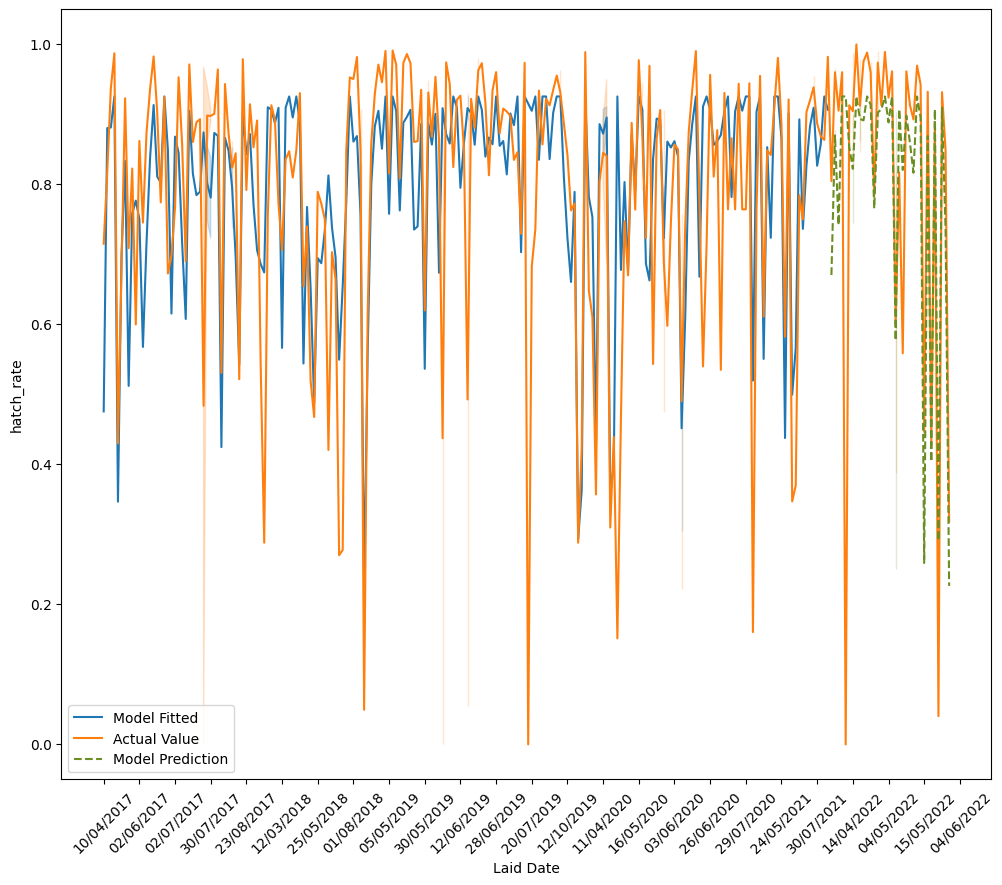

In [28]:
# Plot the actual values vs predicted values
fig, ax = plt.subplots(figsize=(12, 10))

train_predicted = sns.lineplot(x=data.loc[data.index <= split_index]['Laid Date'], y=result.fittedvalues, label='Model Fitted')
train_actual = sns.lineplot(x=data['Laid Date'], y=data['hatch_rate'], label="Actual Value")
test_predicted = sns.lineplot(x=data.loc[data.index > split_index]['Laid Date'], y=y_pred, label='Model Prediction', color='olivedrab', linestyle='--')

#Adjust x ticks
tick_locations = range(0, len(data['Laid Date']), 10)  # show every 10th date
tick_labels = [data['Laid Date'].values[i] for i in tick_locations]  
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(tick_locations))
ax.xaxis.set_major_formatter(matplotlib.ticker.FixedFormatter(tick_labels))
plt.xticks(rotation=45)

plt.show()

## Model Conclusion

So here's our regression formula: 

H = $\exp(-2.3373x - 0.0772)$  

Where:  
* H is the hatch rate
* $x$ is infection rate per nest  

The model tells us that the hatch rate is mainly correlated with only the infection rate of a particular nest, regardless of which beach it comes from, its species or the relocation time. For 1% of increase of the infection rate, the natural logarithm of hatch rate ($ln(HatchRate)$) is estimated to go down by 0.023. And when the infection rate is 0, the average hatch rate is estimated to be 0.9257.

__However there are several things to notice:__
1. Infection rate is likely not the only factor that explains the changes in hatch rate, though it's the only factor in the current model. The current model has an r^2 of 68%, which means the model only explains 68% of the variance, or changes, of the hatch rate. The remaining 32% should be attributed to some other unknown factors not included in the dataset.
2. The correlation between infection rate and hatch rate does NOT equal a causal relation. What it means is that the infection rate can be used as a signal to predict hatch rate, but it doesn't necessarily mean that infection causes the fluctations in hatch rate (it could be, but it cannot be concluded based on our model which only indicates correlation). Instead it might suggest some other underlying factors, which is related to infection rate, which actually causes the fluctuation. It will require further investigation to find out.
3. There was a strong speculation that the hatch rate is also correlated to relocation time based on JTP's experiences, which our analysis disproves. There might be 2 explanations:
    * Relocation time does not impact hatch rate, or
    * Relocation time will only impact hatch rate beyond certain threshold. But the data we have are mostly centered around 30-90 minutes, which is still within a reasonable interval, with only a few points going over 300 minutes. So it is possible that we fail to capture the impact of relocation time on hatch rate due to insufficient data with relocation time beyond that hypothetical threshold.

## Infection Rate Deep-Dive

In [29]:
# Calculate fungus infection rate
beach = data['Beach'].unique()
years = data['Year'].unique()
print('List of beaches: ', beach) # check unique beaches
print('List of years: ', years) # check unique years

List of beaches:  ['Penut' 'Mentawak' 'Munjur' 'Barok']
List of years:  [2017 2018 2019 2020 2021 2022]


In [30]:
# first group egg numbers by both beach and year
grouped = data[['Total of eggs', 'Fungi/Bacteria', 'Year', 'Beach', 'Nest ID']].groupby(['Year', 'Beach']).agg({'Nest ID':'count', 'Total of eggs':'sum', 'Fungi/Bacteria':'sum'})
grouped.rename(columns={'Nest ID':'Nest Count'}, inplace=True)
# print(grouped)

In [31]:
# Then calculate infection rate (ir) by both year and beach, by beach alone, and by year.
grouped['IR_beach_year'] = round(grouped['Fungi/Bacteria']/grouped['Total of eggs'], 4) # IR per beach per year rounded to 4 decimals
# print(grouped)

In [32]:
grouped = grouped.reset_index()
grouped_year = grouped[['Total of eggs', 'Fungi/Bacteria', 'Year']].groupby('Year').sum().reset_index()
grouped_year['IR_year'] = round(grouped_year['Fungi/Bacteria']/grouped_year['Total of eggs'], 4) #total infection rate per year
print(grouped_year)

grouped_beach = grouped[['Total of eggs', 'Fungi/Bacteria', 'Beach']].groupby('Beach').sum().reset_index()
grouped_beach['IR_beach'] = round(grouped_beach['Fungi/Bacteria']/grouped_beach['Total of eggs'], 4) #total infection rate of each beach
grouped_beach = grouped_beach.sort_values(by='IR_beach', ascending=False)
print(grouped_beach)

   Year  Total of eggs  Fungi/Bacteria  IR_year
0  2017           6466           545.0   0.0843
1  2018           2758           251.0   0.0910
2  2019           6441           320.0   0.0497
3  2020           5667           519.0   0.0916
4  2021           1723            42.0   0.0244
5  2022           5901           468.0   0.0793
      Beach  Total of eggs  Fungi/Bacteria  IR_beach
3     Penut           3122           418.0    0.1339
2    Munjur          12975          1228.0    0.0946
0     Barok           1260            79.0    0.0627
1  Mentawak          11599           420.0    0.0362


[Text(0.5, 1.0, 'IR by year')]

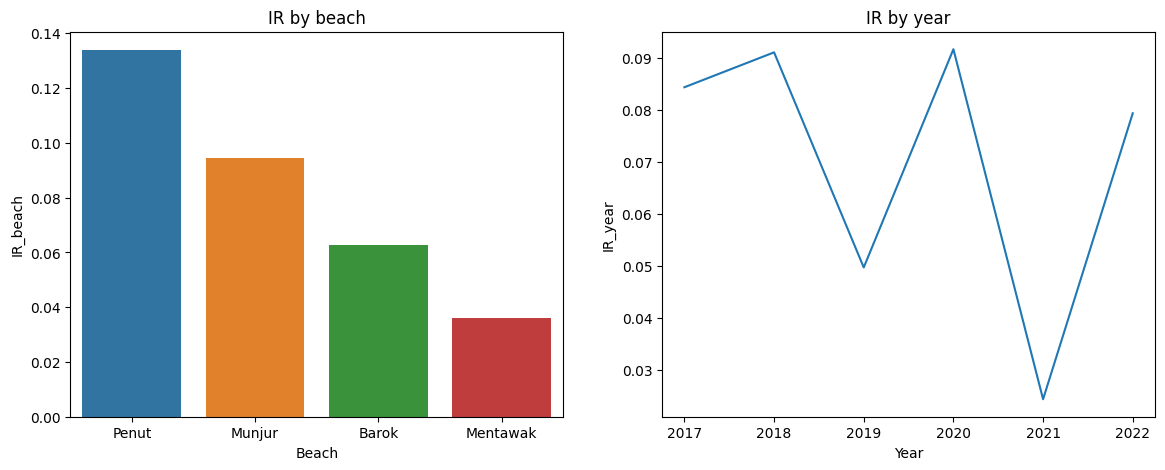

In [33]:
# plot the data
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Beach', y='IR_beach', data=grouped_beach[
    (grouped_beach['Beach']=='Munjur') | 
    (grouped_beach['Beach']=='Penut') | 
    (grouped_beach['Beach']=='Mentawak') |
    (grouped_beach['Beach']=='Barok')]).set(title='IR by beach') # overall infection rate of each beach

plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='IR_year', data=grouped_year, ).set(title='IR by year') # overall infection rate by year

* By beach: Penut has the highest infection rate, followed by Munjur and Barok, Mentawak the lowest.
* By year: The yearly infection rate seems to be fluctuating instead of rising.

<AxesSubplot:xlabel='Year', ylabel='IR_beach_year'>

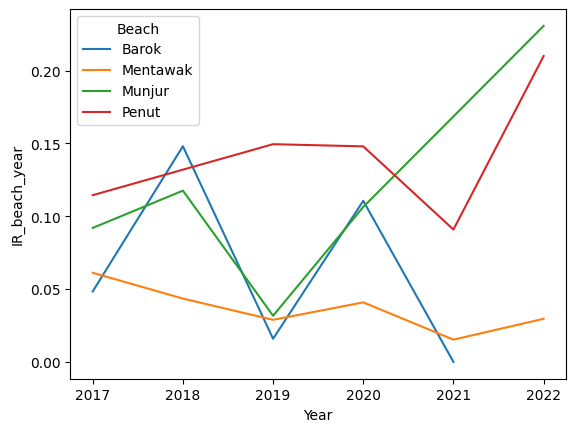

In [34]:
fig = plt.figure()
sns.lineplot(x='Year', y='IR_beach_year', data=grouped, hue=grouped['Beach']) # yearly infection rate of each beach

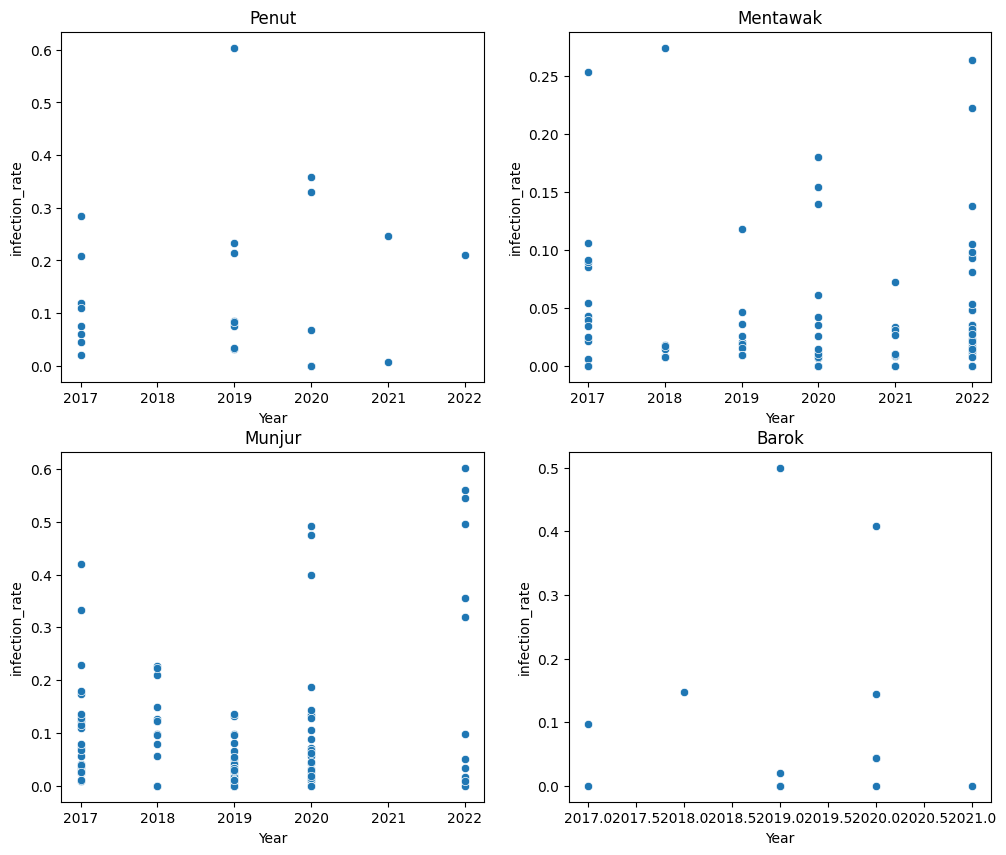

In [35]:
fig = plt.figure(figsize=(12, 10))
n=1

for i in list(beach):
    ax = fig.add_subplot(2,2,n)
    sns.scatterplot(x='Year', y='infection_rate', data=data.loc[data['Beach'] == i])
    ax.set_title(i)
    n += 1

After breakdown of the infection rate of each beach, we can see only Munjur's infection rate is rising over time. Penut has only 2 nests in 2021 and 1 in 2022, so it's difficult to tell whether its infection rate is really going up despite of the line chart. Mentawak remains largely stable.